# Final Project Python for data analysis

### ARTAUD Lucas , DOLLET Maryam , SIVASUBRAMANIAM Iswarya DIA 1

## Drug Consumption data set

##### https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

#### Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from bokeh.io import output_file, show
from bokeh.plotting import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Data Loading

In [71]:
table = ['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
df = pd.read_csv("drug_consumption.data", sep =',', header=None,names= table)
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [72]:
df.shape

(1885, 32)

 The data contains 1885 rows and 32 columns.

## Data cleaning

In [73]:
df.isnull().values.any() # checking if there are any null values

False

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [75]:
del df['ID']

We have decided to delete the column ID as we have already one while importing the data.

We are going to remove the users who claimed to have used the semer drugs as they are considered as over claimants.
Semer is a class of fictitious drug Semeron.We have this information in the dataset's description. 


In [76]:
df = df.drop(df[df['Semer'] != 'CL0'].index)
df.shape

(1877, 31)

We had 8 consumers who claimed to have used Semer.

In [77]:
try:
    del df['Semer'] # we drop the column semer as it is not a drug
    del df['Choc'] # we drop the column Choc because chocolate is not " medically" considered as a drug 
except:
    pass


Chocolate is not officially considered as a drug, but it can act like a drug. We have decided to orient our study only on drugs and delete the column.

## Data pre-processing

In [78]:
df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,0.037577,-0.000771,-0.000984,0.358984,-0.309728,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408
std,0.878387,0.482588,0.949831,0.699707,0.166220,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


From these informations we can see that the mean of all the columns is more or less equal to 0. 
We can conclude that we don't have the need to impute the data.

### Encoding

For each drug in the dataset we have CL0, CL1, CL2, CL3, CL4, CL5, CL6 and CL7 which represent the frequency of use of the drug. We are going to encode these values to 0, 1, 2, 3, 4, 5, 6 and 7 as it will be easier for the machine learning part.


In [79]:
drugs = ['Alcohol',
         'Amyl',
         'Amphet',
         'Benzos',
         'Caff',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]

In [80]:
X=np.array(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'])
Transform=LabelEncoder()
Transform.fit(X)

LabelEncoder()

In [81]:
Transform.transform(X)

array([0, 1, 2, 3, 4, 5, 6])

In [82]:
for drug in drugs:
    df[drug] =Transform.transform(df[drug])

In [83]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,2,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,4,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,2,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,2,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 1884
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1877 non-null   float64
 1   Gender     1877 non-null   float64
 2   Education  1877 non-null   float64
 3   Country    1877 non-null   float64
 4   Ethnicity  1877 non-null   float64
 5   Nscore     1877 non-null   float64
 6   Escore     1877 non-null   float64
 7   Oscore     1877 non-null   float64
 8   Ascore     1877 non-null   float64
 9   Cscore     1877 non-null   float64
 10  Impulsive  1877 non-null   float64
 11  SS         1877 non-null   float64
 12  Alcohol    1877 non-null   int32  
 13  Amphet     1877 non-null   int32  
 14  Amyl       1877 non-null   int32  
 15  Benzos     1877 non-null   int32  
 16  Caff       1877 non-null   int32  
 17  Cannabis   1877 non-null   int32  
 18  Coke       1877 non-null   int32  
 19  Crack      1877 non-null   int32  
 20  Ecstasy 

We don't need to change the type of the different columns

## Preparation Data set for analysis 

As we can see in the dataframe we have already imputed values in the columns. For the analysis part of the project we have decided to replace the values in order to make the visualisation more understandable.

In [85]:
df_analysis = df.copy()

In [86]:
df_analysis['Age'] = ['18-24' if i <= -0.9 else 
                       '25-34' if i >= -0.5 and i < 0 else 
                       '35-44' if i > 0 and i < 1 else 
                       '45-54' if i > 1 and i < 1.5 else 
                       '55-64' if i > 1.5 and i < 2 else 
                       '65+' 
                       for i in df_analysis['Age']]

df_analysis['Gender']  = ['Female' if i> 0 else "Male" for i in df_analysis['Gender']]

df_analysis['Education']=['Left school before 16 years' if i <-2 else 
             'Left school at 16 years' if i > -2 and i < -1.5 else 
             'Left school at 17 years' if i > -1.5 and i < -1.4 else 
             'Left school at 18 years' if i > -1.4 and i < -1 else 
             'Some college or university, no certificate or degree' if i > -1 and i < -0.5 else 
             'Professional certificate/ diploma' if i > -0.5 and i < 0 else 
             'University degree' if i > 0 and i < 0.5 else 
             'Masters degree' if i > 0.5 and i < 1.5 else 
             'Doctorate degree' 
             for i in df_analysis['Education']]

df_analysis['Country']= ['USA' if i < -0.5 else 
           'New Zealand' if i > -0.5 and i < -0.4 else 
           'Other' if i > -0.4 and i < -0.2 else 
           'Australia' if i > -0.2 and i < 0 else 
           'Ireland' if i > 0 and i < 0.23 else 
           'Canada' if i > 0.23 and i < 0.9 else 
           'UK' 
           for i in df_analysis['Country']]

df_analysis['Ethnicity']= ['Black' if i < -1 else 
             'Asian' if i > -1 and i < -0.4 else 
             'White' if i > -0.4 and i < -0.25 else 
             'Mixed-White/Black' if i >= -0.25 and i < 0.11 else 
             'Mixed-White/Asian' if i > 0.12 and i < 1 else 
             'Mixed-Black/Asian' if i > 1.9 else 
             'Other' 
             for i in df_analysis['Ethnicity']]

df_analysis.head()


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,2,0
1,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,4,0
2,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
3,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,2,0
4,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,2,0


In [87]:
#df_analysis.to_csv("df_analysis.csv",sep=";",index = False, header=True) # exporting the analysis dataframe

## Data visualization

### Study on the dataset 

### Age of the questioned people

In [88]:
plt.style.use('seaborn-pastel')

Text(0.5, 1.0, 'Distribution of the Age of the people questioned')

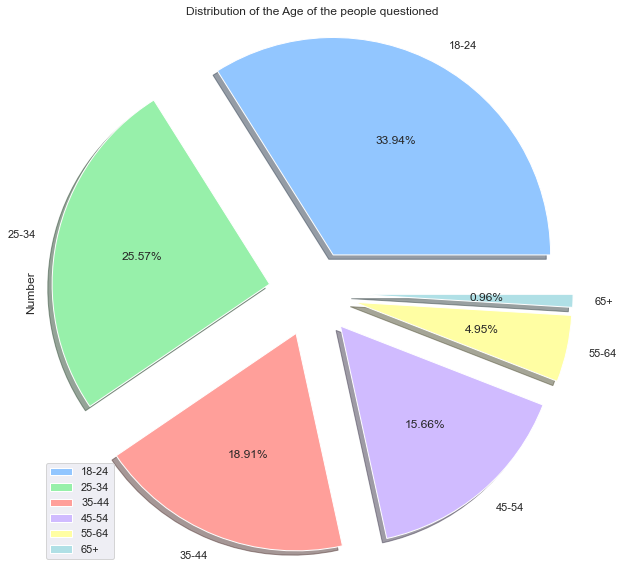

In [89]:
df_count=df_analysis.value_counts("Age").reset_index(name = "Number")
df_count=df_count.set_index(["Age"])
df_count.plot.pie(y="Number",figsize=(20,10),explode = [0.2, 0.2, 0.2,0.2,0.2,0.2],autopct = lambda x: str(round(x, 2)) + '%',shadow = True)
plt.title("Distribution of the Age of the people questioned")

We can see that more than 50 % of the people questioned have between 18-34 years old. Which is comparatively young audience.

### Gender of the questioned people

Text(0.5, 1.0, 'Distribution of the gender of the questioned people')

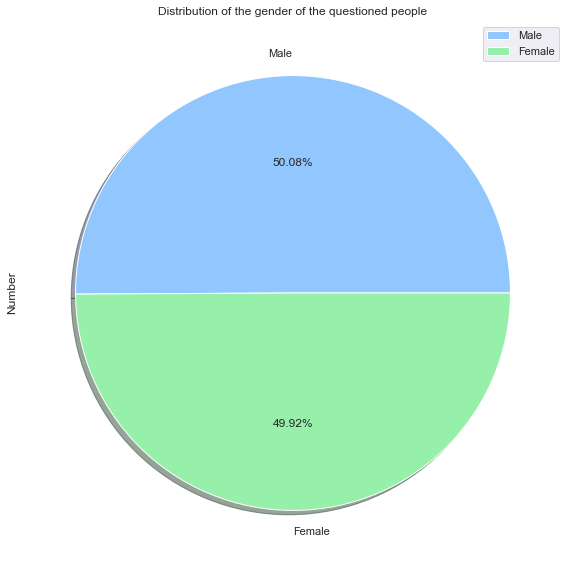

In [90]:
df_count=df_analysis.value_counts("Gender").reset_index(name = "Number")
df_count=df_count.set_index(["Gender"])
df_count.plot.pie(y="Number",figsize=(20,10),autopct = lambda x: str(round(x, 2)) + '%',shadow = True)
plt.title("Distribution of the gender of the questioned people")

We can see that we have approximately 50 % of male and 50% of female. 

### The age of the respondants by the gender

In [91]:
counts = df_analysis.groupby(['Age','Gender']).count()
counts=counts[['Nscore']]
counts = counts.unstack(level=1)
counts.columns = counts.columns.droplevel(level=0)


counts=counts.reset_index()

output_file("stacked.html")

sex = ["Female", "Male"]
colors = ["#FF1CAE", "#38B0DE"]

data = {
       'Female'   : counts['Female'],
       'Male'  : counts['Male']
        }

p = figure(x_range=counts['Age'], height=250, title="Gender count by age",
           toolbar_location=None, tools="")

p.vbar_stack(sex, x='Age', width=0.9, color=colors,source=counts,
             legend_label=sex)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "horizontal"


show(p)

We have more male from the age of 18 to 24 compared to the number of females. Whereas from the age of 25-34 we have more women.

### Ethnicity of the questioned users

Text(0.5, 1.0, 'Donut representing the Ethnicity of the questioned users')

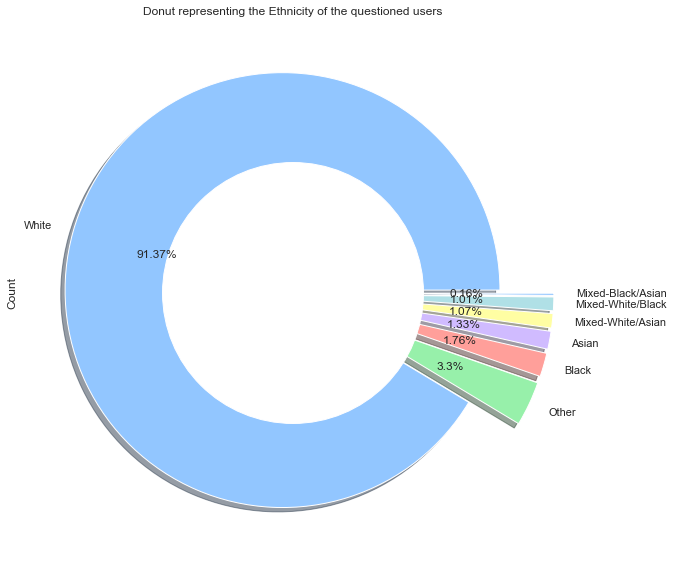

In [92]:
df_counting=df_analysis.value_counts("Ethnicity").reset_index(name = "Count")
df_counting=df_counting.set_index(["Ethnicity"])
df_counting.plot.pie(y="Count",figsize=(20,10),explode = [0.05, 0.2, 0.2,0.2,0.2,0.2,0.2],autopct = lambda x: str(round(x, 2)) + '%',shadow = True,legend=False)
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.title("Donut representing the Ethnicity of the questioned users")

The ethnicity of the questioned users is not well distributed as we have 91.37% of white people. We can say that the dataset is biased.

### Circular barplot on the the Ethnicity of the questioned people

Text(0.5, 1.0, 'Circular barplot of the countries ')

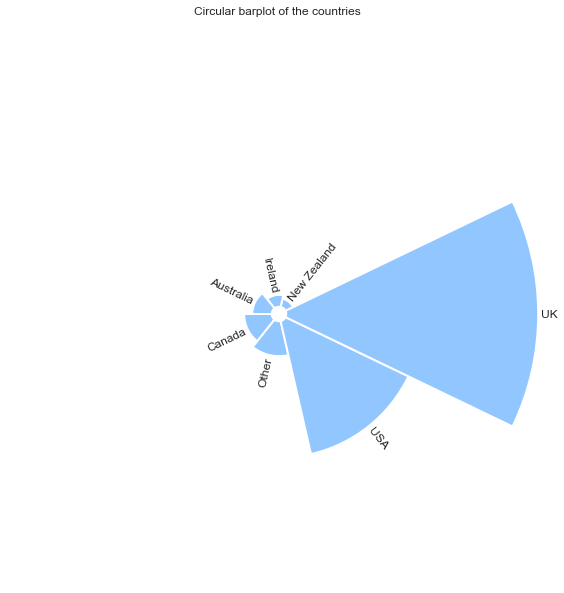

In [93]:
df_country = df_analysis.value_counts(["Country"]).reset_index(name = "Count").sort_values(by="Count")

plt.figure(figsize=(20,10))

ax = plt.subplot(111, polar=True)


plt.axis('off')
upperLimit = 100
lowerLimit = 30

max = df_country['Count'].max()
slope = (max - lowerLimit) / max
heights = slope *df_country['Count'] + lowerLimit

width = 2*np.pi / len(df_country.index)
indexes = list(range(1, len(df_country.index)+1))
angles = [element * width for element in indexes]


bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

labelPadding = 10

for bar, angle, height, label in zip(bars,angles, heights, df_country["Country"]):

 
    rotation = np.rad2deg(angle)

   
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

   
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

plt.title("Circular barplot of the countries ")

Most of the questioned people are from the UK.

## Draw up a typical user profile

### Most used drug during last month

Text(0.5, 1.0, 'Most used drug during last month')

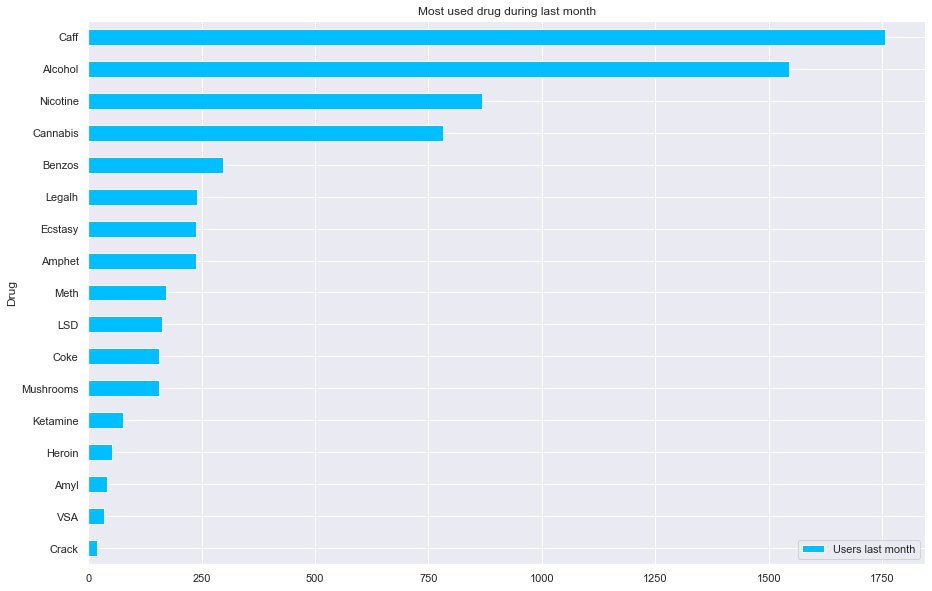

In [94]:
dict_drugs = {}

for drug in drugs:
    dict_drugs[drug]=(df_analysis[drug]>=4).sum()

df_drugs = pd.DataFrame(list(dict_drugs.items()),columns = ['Drug','Users last month']).set_index('Drug').sort_values(by=['Users last month'])
df_drugs.plot.barh(figsize = (15,10),color=["deepskyblue"])

plt.title("Most used drug during last month")

The most used items are caffeine, alcohol and Nicotine but these are not illegal and are widely used. We can say that the most used drug last month is Cannabis.

### Heatmap representing the drug used in function of the age

In [95]:
df_copy=df_analysis[['Age','Education','Gender','Ethnicity','Nscore','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','VSA']].copy()
for drug in drugs:
    df_copy[drug] = np.where(df_analysis[drug] >= 3, 1, 0)

We are going to binarize the data for the heatmap. If the drug was used once in the year, then we will have 1 or else it will be 0.

In [96]:
def Map(col,name): # function that will prepare the data for the heatmap
    df_map = df_copy.groupby([col, name], as_index=False).count()
    df_map = df_map[[col, name, 'Nscore']]


    df_map = df_map.pivot(index=col, columns=name, values="Nscore")
    del df_map[0]
    df_map.rename(columns={1: name}, inplace=True)
    return df_map

Text(0.5, 66.453125, 'Drugs')

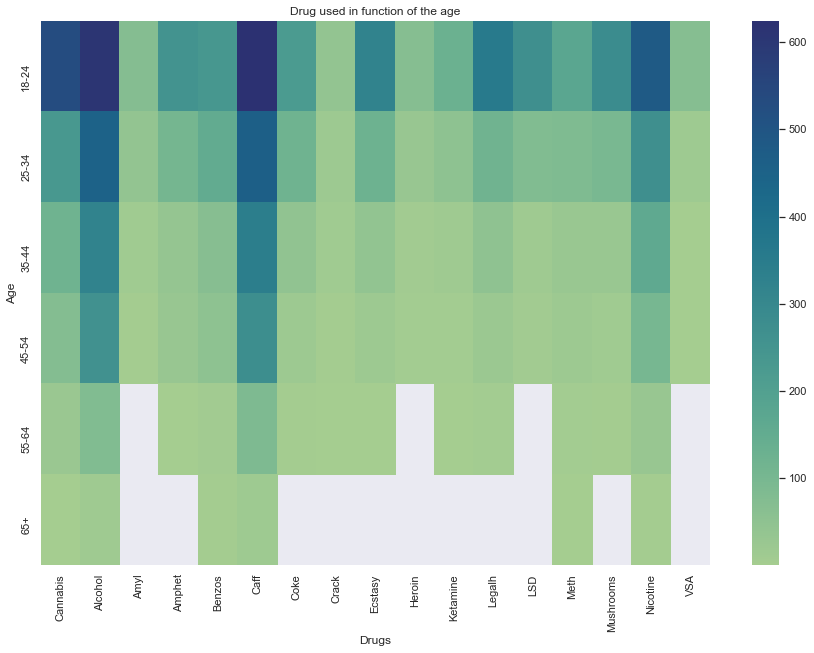

In [97]:
df_test=Map('Age','Cannabis')
for drug in drugs:
    df_test[drug] = Map('Age',drug)[drug]
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_test, cmap="crest")
plt.title("Drug used in function of the age")
plt.xlabel('Drugs')

We can say that among the 18-24 the most used drugs are Alcohol, caffeine, cannabis and Nicotine then we have Lagalh and Ecstasy. In this list the illegal ones are the cannabis, Lagalh and Ecstasy. We have to take an action to prevent this.

### Heatmap representing the drug used in function of the education

In [98]:
education_order = ['Left school before 16 years',
                   'Left school at 16 years',
                   'Left school at 17 years',
                   'Left school at 18 years',
                   'Some college or university, no certificate or degree',
                   'Professional certificate/ diploma',
                   'University degree',
                   'Masters degree',
                   'Doctorate degree']

Text(0.5, 66.453125, 'Drugs')

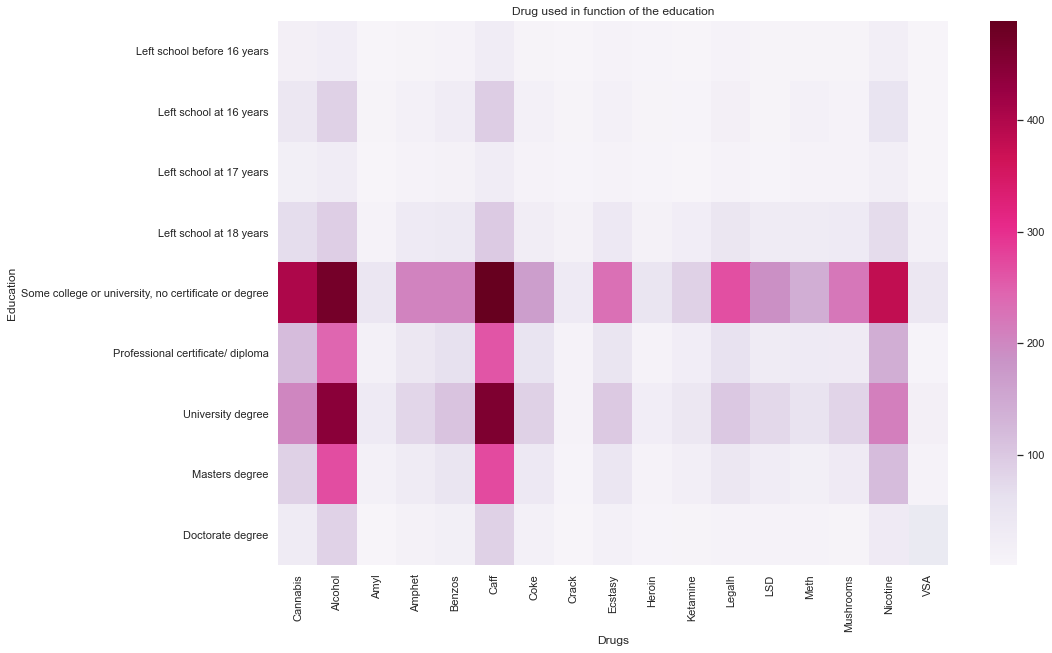

In [99]:
df_test=Map('Education','Cannabis')
df_test = df_test.reindex(index = education_order)

for drug in drugs:
    df_test[drug] = Map('Education',drug)[drug]
sns.heatmap(df_test, cmap='PuRd')
plt.title("Drug used in function of the education")
plt.xlabel('Drugs')

Without any surprises we have Alcohol, caffeine and nicotine widely used among some college or university students.
Cannabis, Legalh, Ecstasy, Amphet, Benzos and mushrooms are the principal drugs used by some college, university undergraduate students in the last year.

We had the impression that those who left school would be drug users,  but here we can see that drugs are mainly used by students.

### Heatmap representing the drug used in function of the ethnicity

Text(0.5, 66.453125, 'Drugs')

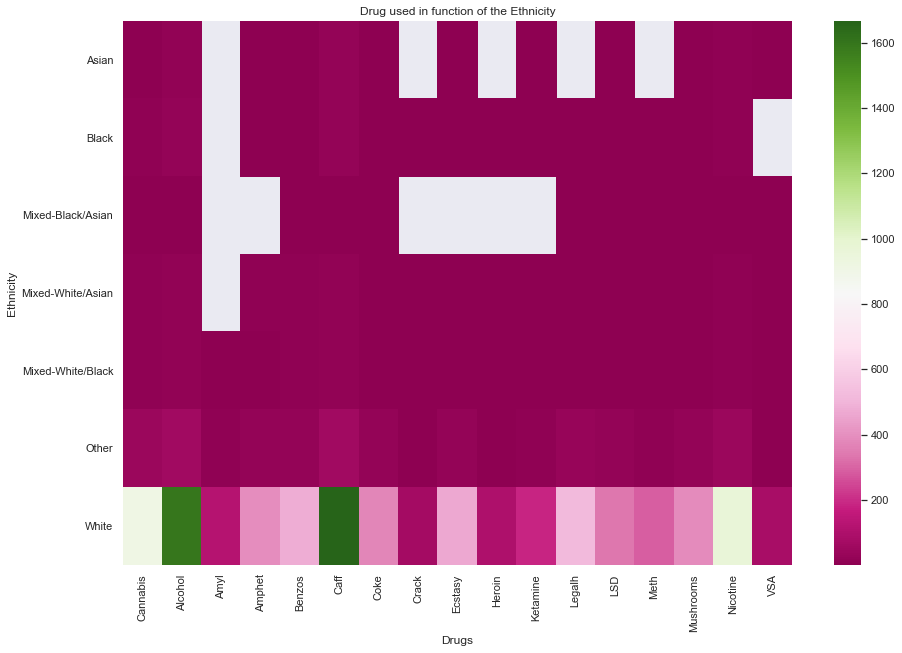

In [100]:
df_test=Map('Ethnicity','Cannabis')


for drug in drugs:
    df_test[drug] = Map('Ethnicity',drug)[drug]
sns.heatmap(df_test,cmap="PiYG")
plt.title("Drug used in function of the Ethnicity")
plt.xlabel('Drugs')

As we saw earlier this database is biased with a majority of white people. With this heatmap we can see that the same drugs are used predominantly.

### Heatmap representing the drug used in function of the gender

Text(0.5, 66.453125, 'Drugs')

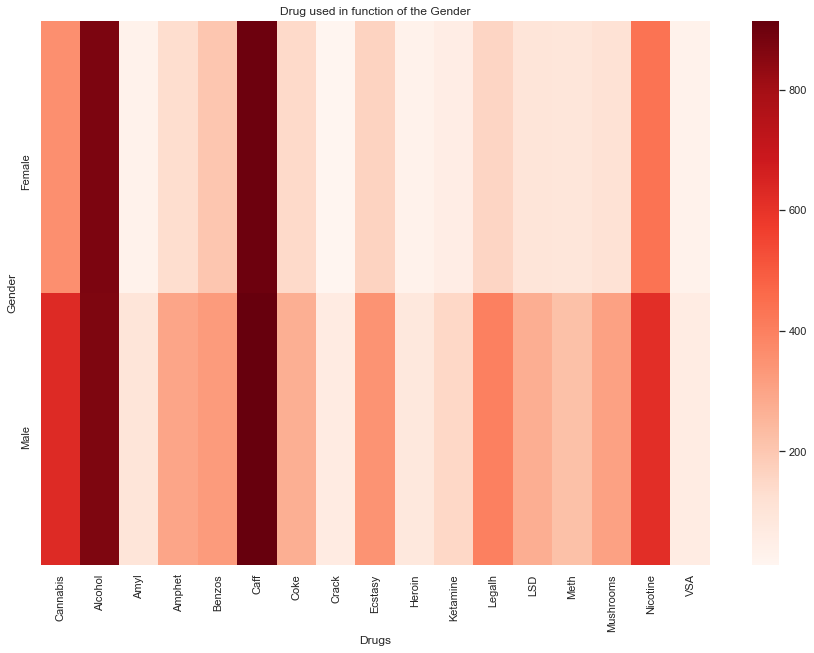

In [101]:
df_test=Map('Gender','Cannabis')


for drug in drugs:
    df_test[drug] = Map('Gender',drug)[drug]
sns.heatmap(df_test,cmap="Reds")
plt.title("Drug used in function of the Gender")
plt.xlabel('Drugs')

We can see from this heatmap that there are more male users than female ones.

### Box plot representing the effect of drug on the scores

Text(0.5, 1.0, ' Box plot representing the effect of drug on the scores')

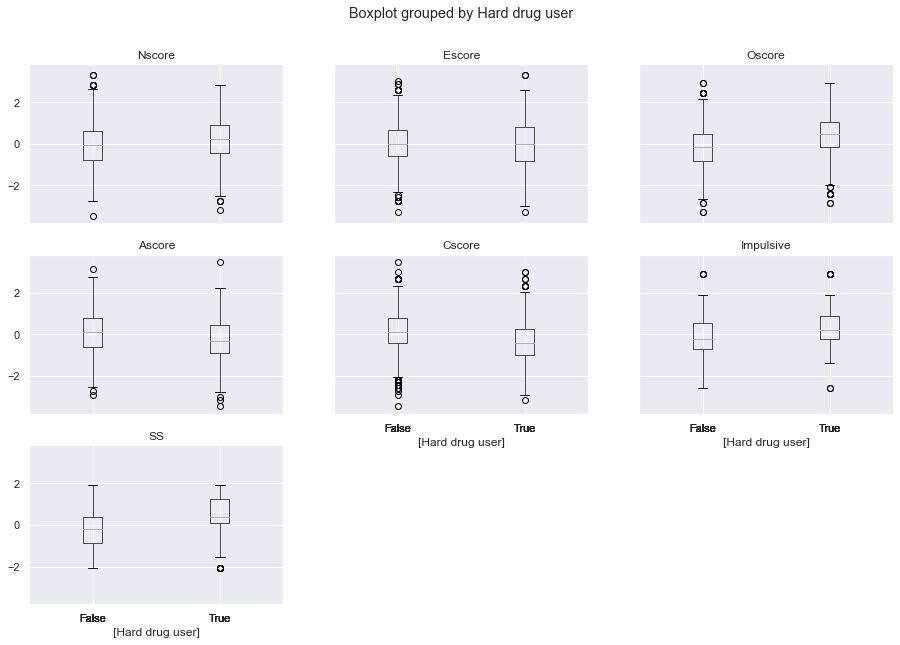

In [102]:
df_analysis['Hard drug user'] = False

hard_drugs = ['Amphet',
              'Coke',
              'Crack',
              'Ecstasy',
              'Heroin',
              'LSD',
              'Meth']

for hard_drug in hard_drugs:
    df_analysis['Hard drug user'] = np.where((df_analysis['Hard drug user']==True) | (df_analysis[hard_drug]>=4), True, False)
        
boxplot = df_analysis.boxplot(column=['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'], by=['Hard drug user'], figsize=(15,10))
plt.title(" Box plot representing the effect of drug on the scores")

We see that hard drug users are more neurotic, open to experience and impulsive. Furthermore, they are less agreeable and conscientious.The effects of hard drug use on behaviour are very negative.

### Heatmap representing the correlation of the variables

Text(0.5, 1.0, ' Heatmap representing the correlation of the variables')

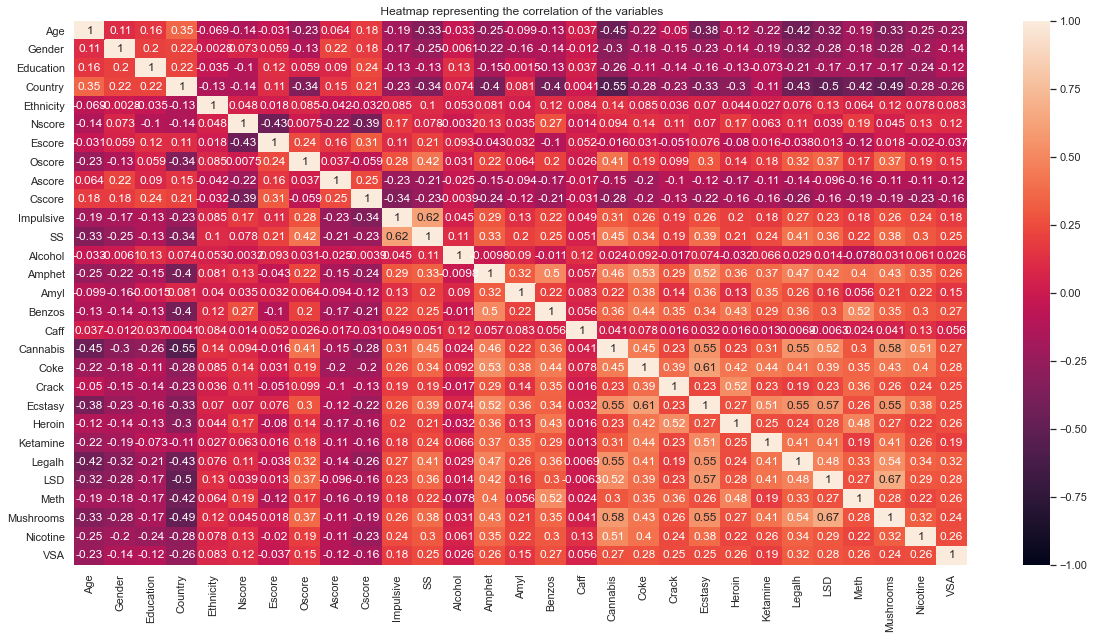

In [103]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title(" Heatmap representing the correlation of the variables")

This heatmap represents the correlation between the different variables which will help for our Machine learning modeling.

## Modeling

We are going to test many models at the same time. The models we are using for our classification are :

In [104]:
models = {
            'Logisitc Regression': LogisticRegression(solver='lbfgs',max_iter=1000),
            'Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier(),
            'Ridge Classifier': RidgeClassifier(),
            'K Neighbors Classifier': KNeighborsClassifier(),
            'Decision Tree Classifier': DecisionTreeClassifier()}

We decided to test the most commun machine learning algorthims and compare them for our classification.

In [105]:
def create_data(column):
    drug_df = df.copy()
    drug_df[column] = np.where(drug_df[column] >= 3, 1, 0)
    return drug_df

This function enables to binarize our data, when the usage of drugs is less than 3 (which means that the drug was used during the year).

In [106]:
def preprocessing(df, column):
    df = df.copy()
    
   
    Y = df[column]
    X = df.drop(column, axis=1)
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1)# have the same result each time we run the code
    
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, Y_train, Y_test

This function enables to automatize the split and to scale of the variables.

In [107]:
def models_for_drug_consumer(data, binarizer):
    model_names =[]
    drug_names = []
    values = []
    l = []

    for drug in drugs:
        if binarizer == True:
            data = create_data(drug)
        X_train, X_test, y_train, y_test = preprocessing(data, drug)
        drug_names.append(drug)
       
        for name, model in models.items():
            model_names.append(name)
          
            model.fit(X_train, y_train)
            yhat = model.predict(X_test)
            acc = accuracy_score(y_test, yhat)
            
            values.append(acc) 

    split_values = [values[x:x+len(models)] for x in range(0, len(values), len(models))]
    model_names = model_names[:len(models)]
    df_results = pd.DataFrame(split_values, columns = model_names)
    df_results = df_results.set_axis(drug_names)
    return df_results

This function enables to do the split for all the drugs and return a data frame containing the accuracy of each model.

We are testing a model the SVC for the classification.

In [108]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [109]:
df_results = models_for_drug_consumer(df, binarizer = False)

In [110]:
df_binarized_results = models_for_drug_consumer(df, binarizer = True)

### Heatmap of our results without binarization

In [111]:
fig = px.imshow(df_results.transpose(),title=" Heatmap of the accuracies")
fig.show()

We can see that the accuracy of the different models are low so we have decided to binarize the data and test the models in order to know if we will have an improvement in the accuracy. We are taking into account the drugs used in the last year.

### Graph showing best predicted drug

In [112]:
df_plots = df_results.copy()

df_plotsT = df_plots.transpose()


In [113]:
fig = go.Figure()

for drug in drugs:
    fig.add_trace(go.Scatter(
    x=list(models.keys()),
    y=df_plotsT[drug].sort_values(),
    name=drug,
    ))
fig.update_layout(title='Best predicted drugs')
fig.show()

Without binarization the best predicted drugs are crack and heroin.

### Graph showing best predicted model

In [114]:
fig = go.Figure()

for model in list(models.keys()):
    fig.add_trace(go.Scatter(
    x=drugs,
    y=df_plots[model].sort_values(),
    name=model
    ))
fig.update_layout(title='Best model performance ')
fig.show()

In [115]:
df_mean=pd.DataFrame(df_results.mean(),columns=["mean"])
df_mean

,mean
Logisitc Regression,0.661921
Support Vector Machines,0.678661
Random Forest Classifier,0.688986
Ridge Classifier,0.661765
K Neighbors Classifier,0.634700
Decision Tree Classifier,0.589956


In [116]:
fig = px.line(df_mean, title='Mean of the accuracy for each model')
fig.show()

The best performing model is Random Forest classifier with an average accuracy of 69%.

### Let's improve our least accurate model before binarization

The least accurate model is Decision tree for alcohol.

In [117]:
decision= DecisionTreeClassifier()
X = df.drop('Alcohol', axis=1)
y = df['Alcohol']
param_grid = { 
    
    'criterion' :['gini','entropy'],
    'max_depth' : range(1,10),
    
    'min_samples_leaf':range(1,10)
    
}


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20,random_state=1)

grid_random = GridSearchCV(estimator=decision, param_grid=param_grid,  cv=5)
grid_random.fit(X_train, Y_train)

print (grid_random.best_score_, grid_random.best_estimator_,grid_random.best_params_)

0.40506312292358804 DecisionTreeClassifier(max_depth=1) {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}


With this grid search we went from 28% to 40% of accuracy for alcohol.

In [118]:
param_grid = { 
    
    'criterion' :['gini','entropy'],
    'max_depth' : [1,2,3],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf':[1,2,3]
    
}


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20,random_state=1)

grid_random = GridSearchCV(estimator=decision, param_grid=param_grid,  cv=5)
grid_random.fit(X_train, Y_train)

print (grid_random.best_score_, grid_random.best_estimator_,grid_random.best_params_)

0.40772978959025463 DecisionTreeClassifier(max_depth=1, max_features='log2', min_samples_leaf=3) {'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'min_samples_leaf': 3}


Here we have a small improvement in the accuracy.

### Heatmap of our results with binarization

In [119]:
fig = px.imshow(df_binarized_results.transpose(),title=" Heatmap of the accuracies")
fig.show()

### Graph showing best predicted drug

In [120]:
df_plotsB = df_binarized_results.copy()
df_plotsB_T = df_plotsB.transpose()

In [121]:
fig = go.Figure()

for drug in drugs:
    fig.add_trace(go.Scatter(
    x=list(models.keys()),
    y=df_plotsB_T[drug].sort_values(),
    name=drug
    ))
fig.update_layout(title='Best predicted drugs (Binarized data)')
fig.show()

The best predicted drug is caffeine for the binarized data, but if we only take 'hard dugs' it is Heroin.

### Graph showing the best predicted model

In [122]:
fig = go.Figure()

for model in list(models.keys()):
    fig.add_trace(go.Scatter(
    x=drugs,
    y=df_plotsB[model].sort_values(),
    name=model
    ))
fig.update_layout(title='Best model performance (Binarized data)')
fig.show()

In [123]:
df_bin_mean=pd.DataFrame(df_binarized_results.mean(),columns=["mean"])


In [124]:
fig = px.line(df_bin_mean, title='Mean of the accuracy for each model')
fig.show()

The best predicted model for the binarized data is also random forest, but we can see that the accuracy is higher 89%.

## Conclusion

After this analysis we can conclude that our best model to predict all drug consumers is on average Random Forest

However, we can apply a different model that performed the best on the drug in question. For instance, Logistic Regression for Meth or Support Vector Machine for LSD.


## API Model prediction

We have to enter the profil of the person to know if he uses a specific drug or not.

In [154]:
def modeling_API():
    
    model_names =[]
    drug_names = []
    values = []
    l = []
    for drug in drugs:
        
        drug_df = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', drug]].copy()
        drug_df[drug] = np.where(drug_df[drug] >= 3, 1, 0)
        Y = drug_df[drug]
        X = drug_df.drop(drug, axis=1)
    
    
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1)
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = pd.DataFrame(scaler.transform(X_train), 
                               index=X_train.index, 
                               columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), 
                              index=X_test.index, 
                              columns=X_test.columns)
        drug_names.append(drug)
       
        for name, model in models.items():
            model_names.append(name)
          
            model.fit(X_train, Y_train)
            yhat = model.predict(X_test)
            acc = accuracy_score(Y_test, yhat)
            
            values.append(acc) 

    split_values = [values[x:x+len(models)] for x in range(0, len(values), len(models))]
    model_names = model_names[:len(models)]
    df_results = pd.DataFrame(split_values, columns = model_names)
    df_results = df_results.set_axis(drug_names)
    return df_results

In [163]:
df_API_results = modeling_API()

### Heatmap of our results with binarization

In [164]:
fig = px.imshow(df_API_results .transpose(),title=" Heatmap of the accuracies for our API")
fig.show()

### Graph showing the best predicted model

In [175]:
fig = go.Figure()

for model in list(models.keys()):
    fig.add_trace(go.Scatter(
    x=drugs,
    y=df_API_results[model].sort_values(),
    name=model
    ))
fig.update_layout(title='Best model performance API')
fig.show()

In [173]:
df_API_mean=pd.DataFrame(df_API_results.mean(),columns=["mean"])


In [166]:
fig = px.line(df_API_mean, title='Mean of the accuracy for each model')
fig.show()

### Model for our API : we have 3 models that have more or less the same accuracy.

#### We are going to use the logistic regression model for our API.

We are going to predict the usage of a specific drug from the details of a person (age, gender, education, country and ethnicity).

In [180]:
def MachineLearning(drug):
    drug_df = df.copy()
    drug_df = drug_df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity', drug]]

    drug_df[drug] = np.where(drug_df[drug] >= 3, 1, 0)

    Y = drug_df[drug]
    X = drug_df.drop(drug, axis=1)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

    model = LogisticRegression(solver='lbfgs',max_iter=1000)
    model.fit(X_train, Y_train)

    yhat = model.predict(X_test)
    accuracy = accuracy_score(Y_test, yhat)
    print('Accuracy of the model:', accuracy)

    # Age :

    print('1: 18-24')
    print('2: 25-34')
    print('3: 35-44')
    print('4: 45-54')
    print('5: 55-64')
    print('6: 65+')
    while(True):
        age = input('Enter a value between 1 and 6: ')
        if (str.isdigit(age) and int(age) >= 1 and int(age) <= 6):
            break
    age = int(age)
    if(age == 1):
        age = -0.95197
    elif(age == 2):
        age = -0.07854
    elif(age == 3):
        age = 0.49788 
    elif(age == 4):
        age = 1.09449 
    elif(age == 5):
        age = 1.82213 
    elif(age == 6):
        age = 2.59171 
    else:
        print('Error')

    # Gender :

    print('1: Female')
    print('2: Male')
    while(True):
        gender = input('Enter a value between 1 and 2: ')
        if (str.isdigit(gender) and int(gender) >= 1 and int(gender) <= 2):
            break
    gender = int(gender)
    if(gender == 1):
        gender = 0.48246 
    elif(gender == 2):
        gender = -0.48246

    else:
        print('Error')

    # Education :

    print('1: Left school before 16 years')
    print('2: Left school at 16 years')
    print('3: Left school at 17 years')
    print('4: Left school at 18 years')
    print('5: Some college or university, no certificate or degree')
    print('6: Professional certificate/ diploma')
    print('7: University degree')
    print('8: Masters degree')
    print('9: Doctorate degree')
    while(True):
        education = input('Enter a value between 1 and 9: ')
        if (str.isdigit(education) and int(education) >= 1 and int(education) <= 9):
            break
    education = int(education)
    if(education == 1):
        education = -2.43591
    elif(education == 2):
        education = -1.73790
    elif(education == 3):
        education = -1.43719
    elif(education == 4):
        education = -1.22751
    elif(education == 5):
        education = -0.61113 
    elif(education == 6):
        education = -0.05921
    elif(education == 7):
        education = 0.45468
    elif(education == 8):
        education = 1.16365
    elif(education == 9):
        education = 1.98437
    else:
        print('Error')

    # Country :

    print('1: Australia')
    print('2: Canada')
    print('3: New Zealand')
    print('4: Other')
    print('5: Republic of Ireland')
    print('6: UK')
    print('7: USA')
    while(True):
        country = input('Enter a value between 1 and 7: ')
        if (str.isdigit(country) and int(country) >= 1 and int(country) <= 7):
            break
    country = int(country)
    if(country == 1):
        country = -0.09765
    elif(country == 2):
        country = 0.24923
    elif(country == 3):
        country = -0.46841
    elif(country == 4):
        country = -0.28519
    elif(country == 5):
        country = 0.21128
    elif(country == 6):
        country = 0.96082
    elif(country == 7):
        country = -0.57009
    else:
        print('Error')      

    # Ethnicity :

    print('1: Asian')
    print('2: Black')
    print('3: Mixed-Black/Asian')
    print('4: Mixed-White/Asian')
    print('5: Mixed-White/Black')
    print('6: Other')
    print('7: White')
    while(True):
        ethnicity = input('Enter a value between 1 and 7: ')
        if (str.isdigit(ethnicity) and int(ethnicity) >= 1 and int(ethnicity) <= 7):
            break
    ethnicity = int(ethnicity)
    if(ethnicity == 1):
        ethnicity = -0.50212
    elif(ethnicity == 2):
        ethnicity = -1.10702
    elif(ethnicity == 3):
        ethnicity = 1.90725
    elif(ethnicity == 4):
        ethnicity = 0.12600
    elif(ethnicity == 5):
        ethnicity = -0.22166
    elif(ethnicity == 6):
        ethnicity = 0.11440
    elif(ethnicity == 7):
        ethnicity = -0.31685
    else:
        print('Error')  

    prediction = model.predict([[age, gender, education, country, ethnicity]])
    prediction = int(prediction[0])

    if (prediction == 0):
        print("The person didn't use", drug, "last year")
    elif (prediction == 1):
        print('The person used', drug, 'last year')
    else:
        print('Error')

In [182]:
MachineLearning('Cannabis')

Accuracy of the model: 0.800531914893617
1: 18-24
2: 25-34
3: 35-44
4: 45-54
5: 55-64
6: 65+
Enter a value between 1 and 6: 6
1: Female
2: Male
Enter a value between 1 and 2: 1
1: Left school before 16 years
2: Left school at 16 years
3: Left school at 17 years
4: Left school at 18 years
5: Some college or university, no certificate or degree
6: Professional certificate/ diploma
7: University degree
8: Masters degree
9: Doctorate degree
Enter a value between 1 and 9: 8
1: Australia
2: Canada
3: New Zealand
4: Other
5: Republic of Ireland
6: UK
7: USA
Enter a value between 1 and 7: 5
1: Asian
2: Black
3: Mixed-Black/Asian
4: Mixed-White/Asian
5: Mixed-White/Black
6: Other
7: White
Enter a value between 1 and 7: 1
The person didn't use Cannabis last year


In [183]:
MachineLearning('Benzos')

Accuracy of the model: 0.7287234042553191
1: 18-24
2: 25-34
3: 35-44
4: 45-54
5: 55-64
6: 65+
Enter a value between 1 and 6: 3
1: Female
2: Male
Enter a value between 1 and 2: 2
1: Left school before 16 years
2: Left school at 16 years
3: Left school at 17 years
4: Left school at 18 years
5: Some college or university, no certificate or degree
6: Professional certificate/ diploma
7: University degree
8: Masters degree
9: Doctorate degree
Enter a value between 1 and 9: 9
1: Australia
2: Canada
3: New Zealand
4: Other
5: Republic of Ireland
6: UK
7: USA
Enter a value between 1 and 7: 7
1: Asian
2: Black
3: Mixed-Black/Asian
4: Mixed-White/Asian
5: Mixed-White/Black
6: Other
7: White
Enter a value between 1 and 7: 7
The person didn't use Benzos last year


## The Problem

We should prevent the usage of drugs among the population that is why we are here, members of the drug control committee, to show the extent of this problem. But also, to show how you, the government, can make a difference.

You chose our committee  to make this conduct this study and to help you make a decision on this issue.

We made this study using the data from a survey made in 2015 in the UK.

How can we target drug users to limit drug consumption ? 


## The conclusion for the problem

It’s important to focus on cannabis, which is the first illicit drug and on young people especially on men.

Moreover, to have a detailed report, we should do another survey and diversify the people we questioned (especially the ethnicity and age) in order to have a more precise model to predict the drug used from the details given. 

We have to do some preventions and also implement more drug rehabilitation centers near the schools and colleges.
